In [2]:
#Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Reading the inputs
PATH = "D:/Learning/Resume_Projects/Mercari Price Suggestion Challenge/input/"
train = pd.read_csv(f'{PATH}train.tsv', sep='\t')
test = pd.read_csv(f'{PATH}test.tsv', sep='\t')

In [4]:
# size of training and dataset
print(train.shape)
print(test.shape)

(1482535, 8)
(693359, 7)


In [5]:
#Quick glipmse of the data
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [6]:
#Checking data types. The files has numeric and string values
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [22]:
#checking for null values: There are null values in category_name, brand_name and item_description
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name             0
brand_name           632682
price                     0
shipping                  0
item_description          6
dtype: int64

In [17]:
print("%d unique category and %d unique brands" % (train['category_name'].nunique(), train['brand_name'].nunique()))

1287 unique category and 4809 unique brands


In [21]:
 #Replace missing values with "No Label"
train['category_name'].fillna("No Label", inplace=True)

In [26]:
#splitting the category data into 3 to get a column for each category
def split_categories(text):
    categories = text.split('/')
    if len(categories) >= 3:
        return pd.Series([categories[0], categories[1], categories[2]])
    elif len(categories) == 2:
        return pd.Series([categories[0], categories[1], None])
    else:
        return pd.Series([categories[0], None, None])

# Apply the function to create new columns
train[['First_cat', 'Second_cat', 'Third_cat']] = train['category_name'].apply(split_categories)


In [7]:
#Checking the target value
print("The mean of the price is %d " % train.price.mean())
print("The median of the price is %d " % train.price.median())
print("The difference b/w them is %d " % (train.price.mean()- train.price.median()))
print("The maximum price is %d and the minimum price is %d" % (train.price.max(), train.price.min()))


The mean of the price is 26 
The median of the price is 17 
The difference b/w them is 9 
The maximum price is 2009 and the minimum price is 0


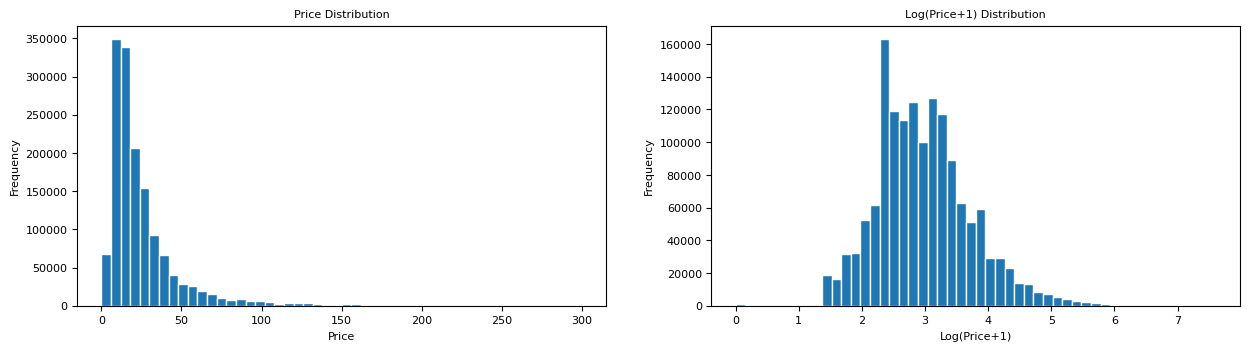

In [8]:
# Below Plot shows the of price where its how heavy skewness as well as variation.
plt.subplot(2, 2, 1)
(train['price']).plot.hist(bins=50, figsize=(15,8), edgecolor='white',range=[0,300])
plt.xlabel('Price', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.tick_params(labelsize=8)
plt.title('Price Distribution', fontsize=8)

#plotting a log-transformation of price help us reduce the skewness as well as normalize the price distrution. Also adding +1 to deal with the 0 and negative values.
plt.subplot(2, 2, 2)
(np.log(train['price']+1)).plot.hist(bins=50, figsize=(15,8), edgecolor='white')
plt.xlabel('Log(Price+1)', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.tick_params(labelsize=8)
plt.title('Log(Price+1) Distribution', fontsize=8)
plt.show()